<a href="https://colab.research.google.com/github/Manjindergit/2413/blob/main/Assignment3_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Linear Regression

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

## Imports
** Import pandas, numpy, and matplotlib. Then set %matplotlib inline
(You'll import sklearn as you need it.)**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [6]:
customers = pd.read_csv('Ecommerce Customers.csv')

**Check the head of customers, and check out its info() and describe() methods.**

In [8]:
customers.head()


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [9]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [10]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [11]:
X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [12]:
Y = customers['Yearly Amount Spent']

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [15]:
import sklearn
from sklearn.linear_model import LinearRegression


**Create an instance of a LinearRegression() model named lm.**

In [16]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [19]:
lm.fit(X_train, Y_train)

LinearRegression()

**Print out the coefficients of the model**

In [20]:
coeff = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
coeff

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [21]:
y_hat = lm.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

<Axes: xlabel='Yearly Amount Spent'>

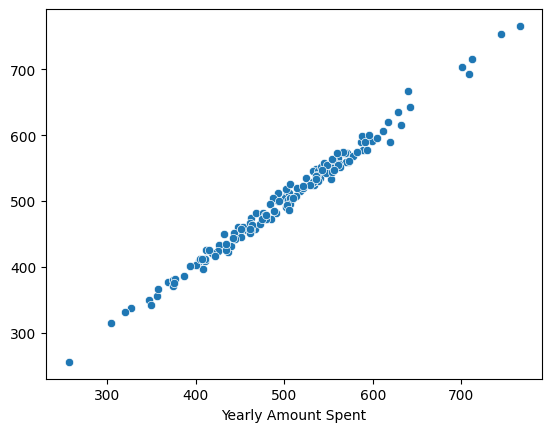

In [23]:
sns.scatterplot(x=Y_test, y=y_hat)

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [24]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, y_hat))
print('MSE:', metrics.mean_squared_error(Y_test, y_hat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_hat)))

MAE: 7.228148653430826
MSE: 79.81305165097427
RMSE: 8.933815066978624


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

**Plot a histogram of the residuals and make sure it looks normally distributed. Use plt.hist().**

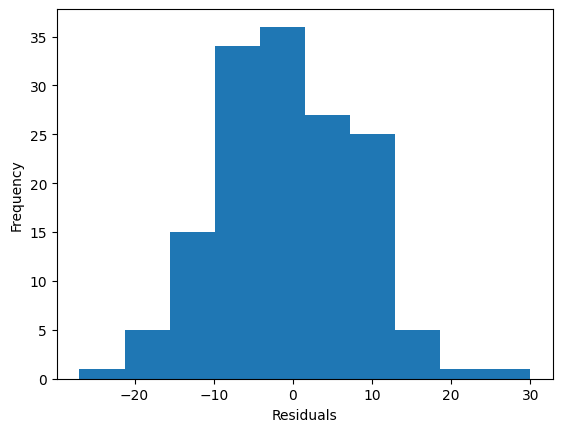

In [33]:
import matplotlib.pyplot as plt
plt.hist(Y_test-y_hat)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [36]:
DataFrame = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
DataFrame

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** How can you interpret these coefficients? **

*Answer here*

* Long Sessions Lengths are positively associated with higher spending, being 25.98 for each additional unit

* Time on App is also positive and increase yearly amount spent by 38.59.

* Time on Website doesn't have any significant effect on spending, but only increase by 0.19 for every extra unit

* Length of Membership has the most effect on earning as its coefficient is 61.27, which means 61.27 increase per every extra unit of membership length.





**Do you think the company should focus more on their mobile app or on their website?**

Since Mobile App has higher coefficient, which means it would improving the app can boost customer spending more in comparision to the webstie.

*Answer here*

## Great Job!

Congrats on your contract work! The company loved the insights! Let's move on.